In [18]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")

from pathlib import Path
from pathlib import Path
measurement_folder  = Path.cwd().parent / 'excel_data'

Data Imports

In [19]:
coord_data_edges = pd.read_excel(measurement_folder/'coords_xy_edges_verticies.xlsx', sheet_name='coordinates')

In [20]:
coord_data_edges.arm_label = coord_data_edges.arm_label.astype("str")

In [21]:
microscope_data_file = measurement_folder/'mikriskop_gap_steeldisk_01_data.xlsx'

vertex_front = pd.read_excel(microscope_data_file, sheet_name='vertex_front')
edge_horizontal_front = pd.read_excel(microscope_data_file, sheet_name='horizontal_front')
edge_vertical_front = pd.read_excel(microscope_data_file, sheet_name='vertical_front')

vertex_back = pd.read_excel(microscope_data_file, sheet_name='vertex_back')
edge_vertical_back = pd.read_excel(microscope_data_file, sheet_name='vertical_back')
edge_horizontal_back = pd.read_excel(microscope_data_file, sheet_name='horizontal_back')


In [22]:
df_front = pd.concat([edge_horizontal_front, edge_vertical_front], axis=0,)
df_front = pd.merge(df_front, coord_data_edges) 

In [23]:
df_front.tail()

,line_type,location,arm_label,front_back,gap_relative,plane_difference,glue_width,arm_type,x,y
37,edge_vertical,NaN,9_3,front,-1.992,30.042,1043.700,vertical,-65.252,-56.51
38,edge_vertical,NaN,19_7,front,-43.348,-15.306,829.598,vertical,-65.252,56.51
39,edge_vertical,NaN,18_17,front,-15.213,47.458,896.291,vertical,-32.626,113.02
40,edge_vertical,NaN,11_12,front,-10.202,13.105,936.826,vertical,32.626,-113.02
41,edge_vertical,NaN,4_15,front,-24.334,-38.704,1054.428,vertical,65.252,-56.51


## find distance funktion

In [24]:
def find_distance(row, df_coords): 
    """returns dict with adjecent points label & coordinates for a row 
       used as helper function for add_adjecent_points"""
    distances = {'adj_x1':None, 'adj_x2':None, 'adj_y1':None , 'adj_y2':None,
                 'dist_1':None, 'dist_2':None, 'label_1':None, 'label_2':None}
    point_distance = 20 #mm
    def distance(x1,y1,x2,y2): return np.sqrt((x1-x2)**2 + (y1-y2)**2) # euclidian distance
    i = 1
    for coord_row in df_coords.itertuples(): 
        d = distance(row.x, row.y, coord_row.x, coord_row.y)
        if 1 < d < point_distance:
            distances[f'adj_x{i}'] = coord_row.x
            distances[f'adj_y{i}'] = coord_row.y
            distances[f'dist_{i}'] = d
            distances[f'label_{i}'] = coord_row.arm_label
            i = i+1
            # print(i)
    return distances

In [25]:
def add_adjecent_points(df, df_coords):
    """returns dataframe with adjecent points label and coordinates (from  df_coords) for each arm_label in df
       used for microscope data visualisation """
    merge_df = pd.DataFrame(columns=['arm_label', 'adj_x1', 'adj_y1', 'dist_1', 'adj_x2', 'adj_y2', 'dist_2'])
    for row in df.itertuples():
        distances = find_distance(row, df_coords)
        distances['arm_label'] = row.arm_label
        distances = pd.DataFrame([distances])
        merge_df = pd.concat([merge_df, distances], ignore_index=True)
    return merge_df

In [26]:
return_df = add_adjecent_points(df_front, coord_data_edges)

In [27]:
return_df.head()

,arm_label,adj_x1,adj_y1,dist_1,adj_x2,adj_y2,dist_2,label_1,label_2
0,19_8,-97.878,18.829,18.882346,-130.504,37.681,18.798608,6,h12
1,19_2,-65.252,37.681,18.860962,-97.878,18.829,18.820017,7,6
2,18_19,-65.252,75.339,18.882964,-97.878,94.191,18.797993,1,h1
3,18_7,-32.626,94.191,18.839586,-65.252,75.339,18.841436,2,1
4,17_7,0.0,75.339,18.862196,-32.626,94.191,18.818786,3,2


## weiter

In [28]:
df_back = pd.concat([edge_horizontal_back, edge_vertical_back])
df_back = pd.merge(df_back,coord_data_edges)

add coordinates to all data files


In [29]:
df_front.drop(columns='line_type', inplace=True)

In [30]:
df_front.head()

,location,arm_label,front_back,gap_relative,plane_difference,glue_width,arm_type,x,y
0,NaN,19_8,front,-29.358,-49.861,1001.235,horizontal,-114.233,28.266
1,NaN,19_2,front,-11.788,18.506,1055.205,horizontal,-81.595,28.266
2,NaN,18_19,front,-2.992,49.575,954.741,horizontal,-81.595,84.798
3,NaN,18_7,front,-32.231,-3.821,881.854,horizontal,-48.957,84.798
4,NaN,17_7,front,-38.763,-0.241,940.619,horizontal,-16.319,84.798


In [31]:
df_front = pd.merge(df_front, return_df)

In [32]:
df_front.head()

,location,arm_label,front_back,gap_relative,plane_difference,glue_width,arm_type,x,y,adj_x1,adj_y1,dist_1,adj_x2,adj_y2,dist_2,label_1,label_2
0,NaN,19_8,front,-29.358,-49.861,1001.235,horizontal,-114.233,28.266,-97.878,18.829,18.882346,-130.504,37.681,18.798608,6,h12
1,NaN,19_2,front,-11.788,18.506,1055.205,horizontal,-81.595,28.266,-65.252,37.681,18.860962,-97.878,18.829,18.820017,7,6
2,NaN,18_19,front,-2.992,49.575,954.741,horizontal,-81.595,84.798,-65.252,75.339,18.882964,-97.878,94.191,18.797993,1,h1
3,NaN,18_7,front,-32.231,-3.821,881.854,horizontal,-48.957,84.798,-32.626,94.191,18.839586,-65.252,75.339,18.841436,2,1
4,NaN,17_7,front,-38.763,-0.241,940.619,horizontal,-16.319,84.798,0.0,75.339,18.862196,-32.626,94.191,18.818786,3,2


In [33]:
hexgrid_path = Path('.')/'disk_analysis_tools'/'Klebeplatte_75mm_with_nuten.png' 

In [38]:
def plot_microscope_glue_canals(dataframe,
                                mode='gap_relative',
                                title='Steelplate gap data',
                                cbar_norm = (-100,0,100),
                                cmap = 'turbo',
                                hexgrid_path = hexgrid_path,
                                figsize=(12,12),
                                cbar_title = "glue penetration depth [$\mu$m]"):
    from matplotlib.colors import TwoSlopeNorm
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=figsize)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    # #* Colorscale centered at 0, spans 200 um across
    colornorm = TwoSlopeNorm(vcenter=cbar_norm[1], vmax=cbar_norm[2], vmin=cbar_norm[0]) 

    cp = ax.scatter(dataframe['x'], dataframe['y'], c=dataframe[mode],
                    cmap=cmap, norm=colornorm, s=1, marker='o', alpha=1)
    c_bar = fig.colorbar(cp, cax=cax) # Add a colorbar to a plot
    c_bar.ax.tick_params(labelsize=18)
    c_bar.ax.set_ylabel(cbar_title, fontsize=18)
    tdp.plot_hexgrid(hexgrid_path, ax)
    for row in dataframe.itertuples():   #? Itterate over rows and be able to acces row attributes as usual
        xs = [row.x, row.adj_x1, row.adj_x2]
        ys = [row.y, row.adj_y1, row.adj_y2]
        def lw_repr(width, norm_width=300): return np.exp(width/norm_width) / 5
        ax.plot(xs, ys,
                c=cp.to_rgba(dataframe.loc[dataframe.arm_label==row.arm_label,:].gap_relative), #* color from scatterplot
                lw=f'{lw_repr(row.glue_width)}' #* linewidth represents width of glue trace on triplet
                )
    if title!=None:
        ax.set_title(title)

    ax.set_xlabel("x [mm]", fontsize=18)
    ax.set_ylabel("y [mm]", fontsize=18)
    return fig,ax


(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'Steelplate gap data'}, xlabel='x [mm]', ylabel='y [mm]'>)

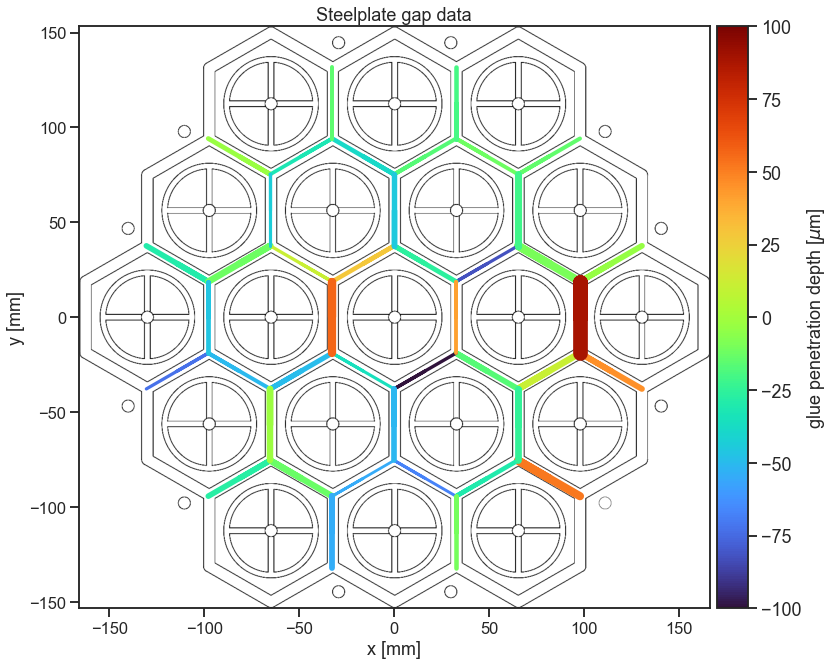

In [39]:
plot_microscope_glue_canals(df_front)